In [1]:
from datetime import datetime, timedelta
import pandas as pd
import ConveyorMetrics

In [2]:
import aerospike
config = {
    'hosts': [('35.228.136.58', 3000)]
}
client = aerospike.client(config).connect()
data_as_key = ("ids_to_validate", "data", "data")
bert_data_key = ("ids_to_validate", "data", "bert_tags")

tags_dictionary = client.get(data_as_key)[-1]['tags']
guten_tag_labels = client.get(bert_data_key)[-1]["gutenTag"]
print("tags_dictionary:", len(tags_dictionary))
print("guten_tag_labels:",len(guten_tag_labels))

tags_dictionary: 6007
guten_tag_labels: 254


In [3]:
# client.get(bert_data_key)[-1]["categories_tags"]

In [4]:
# guten_tag_labels

In [5]:
start_date = datetime.today()
end_date = start_date - timedelta(days=4)
print(start_date, end_date)
ConveyorMetrics.get_stats(start_date, end_date, guten_tag_labels)

2020-04-23 15:10:23.722430 2020-04-19 15:10:23.722430


{'Period': {'Start': '2020-04-23 15:10:23.722430',
  'End': '2020-04-19 15:10:23.722430'},
 'Total processed': {'Validator': 514,
  'Analyst': 520,
  'Search': 350,
  'Feed': 57,
  'Dictionary': 6007},
 'Removed': {'Validator': 0.39, 'Analyst': 0.22},
 'Tagging': {'GutenTag': {'RAW': {'Validator': 0.68, 'Analyst': 0.64},
   'DICT': {'Validator': 0.67, 'Analyst': 0.64}},
  'Entities': {'RAW': {'Validator': 0.15, 'Analyst': 0.1},
   'DICT': {'Validator': 0.15, 'Analyst': 0.1}},
  'Both Models': {'RAW': {'Validator': 0.53, 'Analyst': 0.46},
   'DICT': {'Validator': 0.52, 'Analyst': 0.47}},
  'Analyst-Validator': {'RAW': 0.83, 'DICT': 0.88},
  'TAGS NOT IN DICT': {'Validator': 38, 'Analyst': 7}},
 'GutenShifts': {'Analyst': 0.79},
 'GutenIndustries': {'Analyst': 0.87}}

In [1]:
import matplotlib.pyplot as plt
import matplotlib

[datetime.datetime(2020, 4, 23, 15, 24, 40, 595987), datetime.datetime(2020, 4, 22, 15, 24, 40, 595987)]
[datetime.datetime(2020, 4, 22, 15, 24, 40, 595987), datetime.datetime(2020, 4, 21, 15, 24, 40, 595987)]
[datetime.datetime(2020, 4, 21, 15, 24, 40, 595987), datetime.datetime(2020, 4, 20, 15, 24, 40, 595987)]


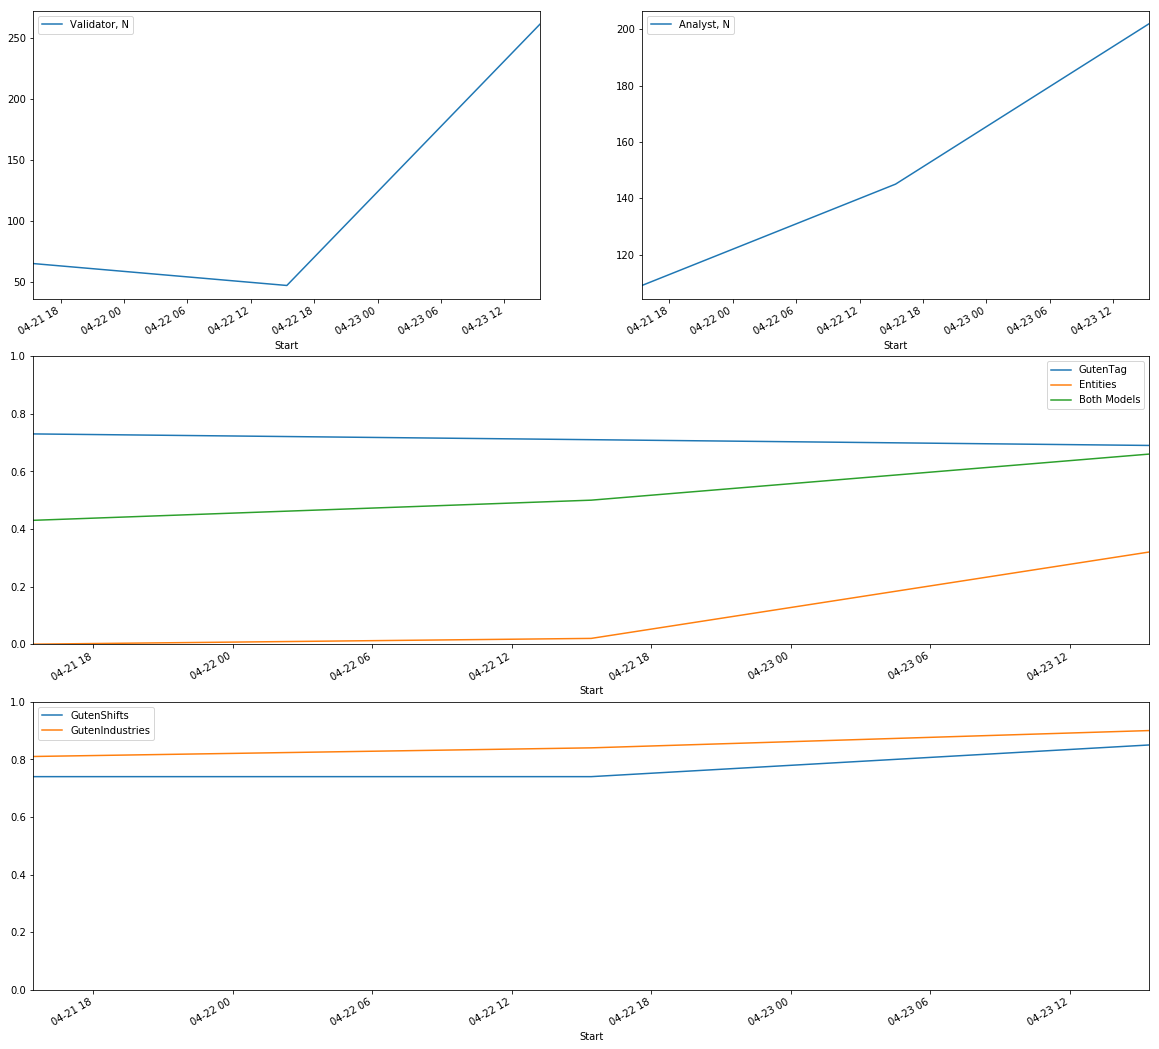

In [2]:
from datetime import datetime, timedelta
import pandas as pd
import ConveyorMetrics
ConveyorMetrics.show_graphs(datetime.today(), datetime(2020, 4, 20), 1)

In [9]:
for i in ConveyorMetrics.get_date_list(datetime.today(), datetime(2020, 4, 20), 1):
# for i in ConveyorMetrics.get_date_list(datetime.today(), datetime(2019, 11, 30), 1):
    start_date = i[0]
    end_date = i[1]
    try:
        stats_t = ConveyorMetrics.get_stats(start_date, end_date, guten_tag_labels)
        print('Period', stats_t['Period'])
        print('Total processed', stats_t['Total processed']['Validator'])
        print('Removed', stats_t['Removed'])
        print()
        print('GutenTag', stats_t['Tagging']['GutenTag']['RAW']['Validator'])
        print('Entities', stats_t['Tagging']['Entities']['RAW']['Validator'])
        print('Both Models', stats_t['Tagging']['Both Models']['RAW']['Validator'])
        print()
        print('GutenShifts', stats_t['GutenShifts']['Analyst'])
        print('GutenIndustries', stats_t['GutenIndustries']['Analyst'])
        print()
        
#         print(stats_t)
        print("-----------------------------------/---------------")
        print()
    except Exception as err:
        pass

Period {'Start': '2020-04-23 14:57:44.389224', 'End': '2020-04-22 14:57:44.389224'}
Total processed 252
Removed {'Validator': 0.41, 'Analyst': 0.11}

GutenTag 0.69
Entities 0.31
Both Models 0.66

GutenShifts 0.85
GutenIndustries 0.9

-----------------------------------/---------------

Period {'Start': '2020-04-22 14:57:44.389224', 'End': '2020-04-21 14:57:44.389224'}
Total processed 47
Removed {'Validator': 0.49, 'Analyst': 0.28}

GutenTag 0.71
Entities 0.02
Both Models 0.5

GutenShifts 0.75
GutenIndustries 0.85

-----------------------------------/---------------

Period {'Start': '2020-04-21 14:57:44.389224', 'End': '2020-04-20 14:57:44.389224'}
Total processed 71
Removed {'Validator': 0.3, 'Analyst': 0.33}

GutenTag 0.71
Entities 0.0
Both Models 0.42

GutenShifts 0.74
GutenIndustries 0.81

-----------------------------------/---------------

